In [234]:
import numpy as np
import random as rd
import scipy as sp
import time
import matplotlib.pyplot as plt

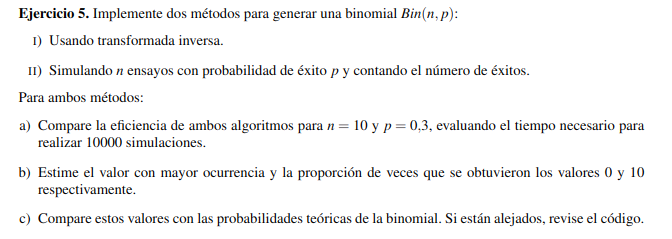

In [235]:
def bin_transformada_inv(n,p):
    c = p / (1-p)
    prob = (1-p)**n

    F = prob
    i = 0
    u = rd.random()

    while u > F:
        prob *= c * (n-i)/(i+1)
        F += prob
        i += 1
    
    return i

In [236]:
def simulacion_transformada(n,p,N):
    simulacion = [bin_transformada_inv(n,p) for _ in range(N)] 
    # la binomial devuelve algo entre 0 y n
    ocurrencias = []
    for i in range(n+1): # debo ver desde el 0 hasta el n, por eso n+1
        ocurrencias.append((i,(simulacion.count(i))))

    return ocurrencias


In [237]:
def ensayos_bin(n, p):
    exitos = 0
    for _ in range(n):
        u = rd.random()
        if u < p:
            exitos += 1

    return exitos

In [238]:
def simulacion_ensayos(n,p,N):
    simulacion = [ensayos_bin(n,p) for _ in range(N)]
    ocurrencias = []
    for i in range(n+1):
        ocurrencias.append((i, simulacion.count(i)))

    return ocurrencias

In [239]:
%%time
nsims = 10000
n = 10
p = 0.3
print("Simulacion de Binomial con transformada inversa")
ocurrencias = simulacion_transformada(n,p,nsims)
print("Ocurrencias: ", ocurrencias)
maximo = max(ocurrencias, key=lambda x: x[1])
print("Maximo: ", maximo) # tiene sentido, pues p = 0.3, si tiro 10 veces, lo más probable es que salga 3 veces
# proporcion de apariciones de 0 y 10
print("Proporcion de 0 y 10: ", ocurrencias[0][1]/nsims, ocurrencias[-1][1]/nsims)

Simulacion de Binomial con transformada inversa
Ocurrencias:  [(0, 309), (1, 1256), (2, 2273), (3, 2648), (4, 2006), (5, 1032), (6, 387), (7, 76), (8, 12), (9, 1), (10, 0)]
Maximo:  (3, 2648)
Proporcion de 0 y 10:  0.0309 0.0
CPU times: user 11.1 ms, sys: 0 ns, total: 11.1 ms
Wall time: 11 ms


In [240]:
%%time
print("Simulacion de Binomial con n ensayos")
ocurrencias = simulacion_ensayos(n,p,nsims)
print("Ocurrencias: ", ocurrencias)
maximo = max(ocurrencias, key=lambda x: x[1])
print("Maximo: ", maximo) # tiene sentido, pues p = 0.3, si tiro 10 veces, lo más probable es que salga 3 veces
# proporcion de apariciones de 0 y 10
print("Proporcion de 0 y 10: ", ocurrencias[0][1]/nsims, ocurrencias[-1][1]/nsims)


Simulacion de Binomial con n ensayos
Ocurrencias:  [(0, 284), (1, 1158), (2, 2257), (3, 2704), (4, 2032), (5, 1066), (6, 386), (7, 96), (8, 16), (9, 1), (10, 0)]
Maximo:  (3, 2704)
Proporcion de 0 y 10:  0.0284 0.0
CPU times: user 13.3 ms, sys: 0 ns, total: 13.3 ms
Wall time: 13.1 ms


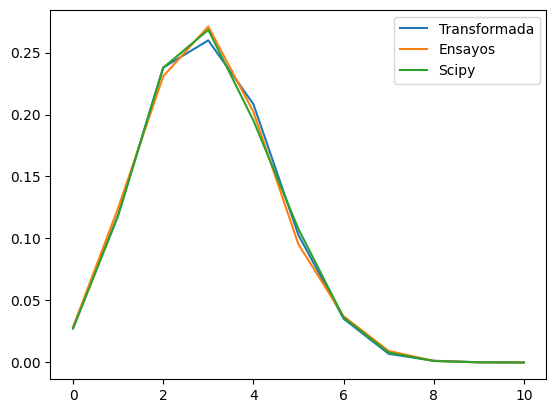

In [241]:
""" 
Comparo en un mismo grafico los valores de las binomiales de ambos metodos, 
y las comparo con la binomial de scipy
"""

n = 10
p = 0.3
nsims = 10000

ocurrencias_transformada = simulacion_transformada(n,p,nsims)
# obtengo la proporcion de ocurrencias de cada valor
for i in range(n+1):
    ocurrencias_transformada[i] = (ocurrencias_transformada[i][0], ocurrencias_transformada[i][1]/nsims)

ocurrencias_ensayos = simulacion_ensayos(n,p,nsims)
for i in range(n+1):
    ocurrencias_ensayos[i] = (ocurrencias_ensayos[i][0], ocurrencias_ensayos[i][1]/nsims)

valores_scipy = [] # usar rvs
for i in range(nsims):
    valores_scipy.append(sp.stats.binom.rvs(n,p))

ocurrencias_scipy = []
for i in range(n+1):
    ocurrencias_scipy.append((i, valores_scipy.count(i)/nsims))


plt.plot([x[0] for x in ocurrencias_transformada], 
         [x[1] for x in ocurrencias_transformada], 
         label="Transformada")

plt.plot([x[0] for x in ocurrencias_ensayos],
         [x[1] for x in ocurrencias_ensayos],
         label="Ensayos")

plt.plot([x[0] for x in ocurrencias_scipy],
         [x[1] for x in ocurrencias_scipy],
         label="Scipy")

plt.legend()
plt.show()
